In [11]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [6]:
import db
import numpy as np
import matplotlib.pyplot as plt
import locate
import scipy as sp

In [7]:
%sql sqlite:///schema/test.db

u'Connected: None@schema/test.db'

In [15]:
%matplotlib notebook
result = %sql select * from experiment
print result

result = %sql select experiment_id, array_id, mic_id, delay from mic
print result

result = %sql select * from array
print result

result = %sql select * from mic_pair
print result

Done.
+----+------------+-----+-----+
| id |  datetime  |  x  |  y  |
+----+------------+-----+-----+
| 1  | 1488653272 | 1.0 | 0.0 |
| 2  | 1488653323 | 0.0 | 0.0 |
| 3  | 1488653350 | 0.0 | 0.0 |
| 4  | 1488653417 | 0.0 | 0.0 |
| 5  | 1488653619 | 0.0 | 0.0 |
| 6  | 1488653686 | 0.0 | 0.0 |
| 7  | 1488653843 | 0.0 | 0.0 |
| 8  | 1488653893 | 0.0 | 0.0 |
| 9  | 1488653975 | 0.0 | 0.0 |
| 10 | 1488654129 | 0.0 | 0.0 |
| 11 | 1488654208 | 0.0 | 0.0 |
| 12 | 1488654328 | 0.0 | 0.0 |
| 13 | 1488654364 | 0.0 | 0.0 |
| 14 | 1488654621 | 0.0 | 0.0 |
| 15 | 1488654653 | 0.0 | 0.0 |
| 16 | 1488654676 | 0.0 | 0.0 |
| 17 | 1488654723 | 0.0 | 0.0 |
| 18 | 1488655088 | 0.0 | 0.0 |
| 19 | 1488655123 | 0.0 | 0.0 |
| 20 | 1488655378 | 0.0 | 0.0 |
| 21 | 1488655430 | 0.0 | 0.0 |
| 22 | 1488655513 | 0.0 | 0.0 |
| 23 | 1488655676 | 0.0 | 0.0 |
| 24 | 1488655982 | 0.0 | 0.0 |
| 25 | 1488657172 | 0.0 | 0.0 |
| 26 | 1488657276 | 0.0 | 0.0 |
| 27 | 1488657872 | 0.0 | 0.0 |
| 28 | 1488658326 | 0.0 | 0.0 |
| 

In [18]:
cur_experiment_id = 6
result = %sql select data from mic where experiment_id = :cur_experiment_id

mic_1 = result[0][0]
mic_2 = result[1][0]
print np.array(mic_1)

# This is equivalent to what mic_1 is doing to fetch data
#mic_3 = db.get_mic_data(cur_experiment_id, 0, 0)

mic_3 = result[2][0]

Done.
[140 140 141 ..., 140 141 139]


<IPython.core.display.Javascript object>


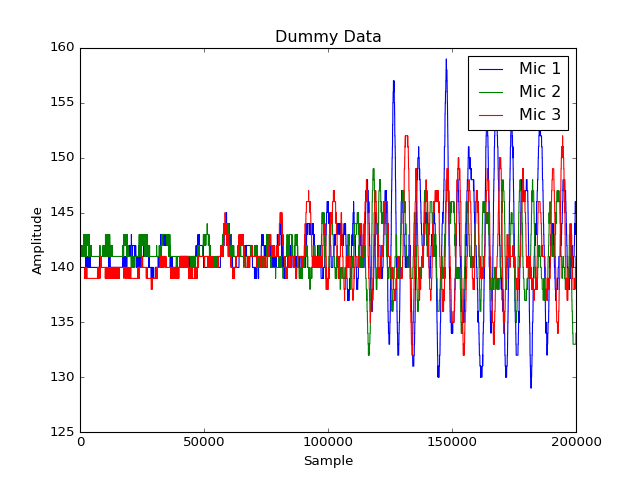

In [22]:
import matplotlib.pyplot as plt
#print locate.xcorr(np.array(mic_1), np.array(mic_2))

plt.plot(sp.signal.medfilt(mic_1, 51), label='Mic 1', lw=1)
plt.plot(sp.signal.medfilt(mic_2, 51), label='Mic 2', lw=1)
plt.plot(sp.signal.medfilt(mic_3, 51), label='Mic 3', lw=1)
plt.legend()
plt.title('Dummy Data')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()